<a href="https://colab.research.google.com/github/tharina11/Geospatial-Projects/blob/main/Import_a_Raster%2C_Explore%2C_and_Generate_a_Mask_using_GDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Read and Write raster data with GDAL**

In this code, we will read a raster file into an array using GDAL library. We will explore the spatial and pixel attributes of the raster file in depth. Then, we will write an array into a raster file.

Several online sources were reffered to obtain the Python code and deeper knowledge on the concepts explored. The references are cited at the end of the code. The input image was downloaded form USGS [ScienceBase-Catalog](https://www.sciencebase.gov/catalog/item/543e6b86e4b0fd76af69cf4c) and cropped using QGIS.


We will import a raster file using GDAL and convert it into an array, perform calculations on the array and write the calculation output as a Geotiff file.

Read [GDAL website](https://gdal.org/) (navigate to Python) to learn more about each function used in the code below.

In [ ]:
# Import libraries
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Mount google drive and authenticate
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import image into a dem(digital elevation model) object from google drive
dem = gdal.Open('/content/drive/MyDrive/GDAL/Data/Raster_OR.tif')

The raster file used in this code is a digital elevation model. This is a 2D array which consists of pixels with the elevation values of a particular area on the earth surface.

In [ ]:
# Metadata of the input image
metadata = dem.GetMetadata()
metadata

{'AREA_OR_POINT': 'Area'}

In [ ]:
# Get geotransform of the input image
geo_transform = dem.GetGeoTransform()
geo_transform

(438535.0000224668, 1.0, 0.0, 4649329.000017767, 0.0, -1.0)

[Geotransform](https://gdal.org/tutorials/geotransforms_tut.html) is an affine transformation from image coordinate space to the georeference corrdinate space. Geotransform consists of 6 parameters

1. GT (0): x coordinate of upper left corner of the upper left pixel,
2. GT (1): pixel width(W-E),
3. GT (2): row rotation,
4. GT (3): y coordinate of the upper left corner of the upper left pixel,
5. GT (4): column rotation,
6. GT (5): Pixel height (N-S) (negative for north -up images)

In [ ]:
# Projection of the raster file
dem_projection = dem.GetProjection()
dem_projection

'PROJCS["NAD83 / UTM zone 10N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26910"]]'

It is not possible to draw curved earth surface withoubt stretching and tearing it. [Projections](https://learn.arcgis.com/en/projects/choose-the-right-projection/) are calculations which makes it possible to draw the earth surface on a flat paper. 
Map projections apply the necessary distrotions in a systematic way that allows us to control where and how the distrortions happen. There is no projection that matches for the whole earth. Each projection distorts the earth surface preserving some geometic property/properties with expense of distorting other [properties](https://learn.arcgis.com/en/projects/choose-the-right-projection/#understand-projections).

- Conformal projections: 
 - preserves angle locally; shape of features appears true
 - cost: distort areas and distances

- Equal area projections: 
 - preserve area
 - cost: distort angles, so the shape of objects appear skewed

- Equidistant projections:
 - preserve distances, only from certain points or along certain lines

- Compromise projections: 
 - Not perfectly correct, but not badly distorted

There are more projection types. Selecting a projection for a project depends on the part of the world you map, scale, and the purpose of the map. 

In [ ]:
# Number of bands in the raster file
dem.RasterCount

1

DEMs usually consists of one band (consists of elevation values). Other multipsectral satellite images consists of multiple bands that represents the energy values recorded from each region of the electromagnetic spectrum.

In [ ]:
# GDAL object
dem

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f6c5f49a300> >

In [ ]:
# Type of the input data object
type(dem)

osgeo.gdal.Dataset

The object 'dem' we created is a gdal dataset. A gdal dataset encapsulates one or more raster bands. In order to read the data in the dem band, we have to access the dem band. We will use the method below to read and assign that band to a variable called band.

In [ ]:
# Assign the raster values to an object
band = dem.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f6c9eaa5c30> >

In [ ]:
# Type of the new object
type(band)

osgeo.gdal.Band

In [ ]:
# Convert gdal band to a numpy array
dem_array = band.ReadAsArray()
dem_array

array([[628.1063 , 628.1324 , 628.1666 , ..., 661.4545 , 661.3377 ,
        661.22375],
       [629.03094, 629.0601 , 629.0032 , ..., 661.54407, 661.4402 ,
        661.35315],
       [629.7617 , 629.74615, 629.6209 , ..., 661.63464, 661.53687,
        661.44434],
       ...,
       [753.68   , 753.6787 , 753.6319 , ..., 593.5979 , 593.0235 ,
        592.5562 ],
       [753.76715, 753.7081 , 753.5967 , ..., 593.51965, 592.99066,
        592.51587],
       [753.834  , 753.6893 , 753.5426 , ..., 593.3797 , 592.8864 ,
        592.4038 ]], dtype=float32)

In [ ]:
# Shape of the array
dem_array.shape

(1062, 1052)

In [ ]:
# Minimum and maximum values of the array
dem_array[0].min(), dem_array[0].max()

(534.6667, 665.91125)

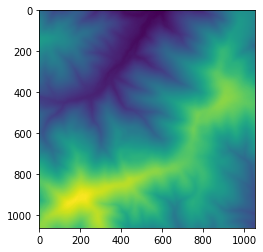

In [ ]:
# Plot the array using matplotlib
plt.figure()
plt.imshow(dem_array)

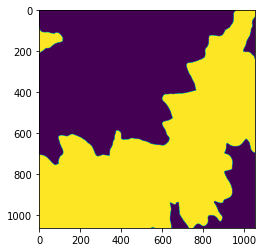

In [ ]:
# Mask the pixels with values below the mean of the array
binmask = np.where((dem_array > np.mean(dem_array)), 1, 0)
plt.figure()
plt.imshow(binmask)

In [ ]:
# Shape of the array after applying the mask
binmask.shape

(1062, 1052)

Let's write the mask to a raster files. In order to write an array to a raster, we have to import geotiff raster driver. 

The array do not have any spatial details. Therefore assign the geotransfrom and projection from the input file to the output mask. Covnvert the array to a raster band and assign nan to the pixels without values. FlushCache() function will write the data processed by gdal, but are buffered to a file properly. Finally the output dataset and the output band should be closed to make sure that the data is written properly to the output tif file.

In [ ]:
# Import geotiff raster driver and write mask to a tif file
driver = gdal.GetDriverByName('GTiff')
driver.Register()
output_dataset = driver.Create('binmask.tif', xsize= binmask.shape[1],
                               ysize= binmask.shape[0],
                               bands = 1,
                               eType = gdal.GDT_Int16)
output_dataset.SetGeoTransform(geo_transform)
output_dataset.SetProjection(dem_projection)
output_band = output_dataset.GetRasterBand(1)
output_band.WriteArray(binmask)
output_band.SetNoDataValue(np.nan)
output_band.FlushCache()

# Close dataset and bands to data to write properly
output_dataset = None
output_band = None

#### **Reference**

- [Read and write raster files with GDAL in Python](https://www.youtube.com/watch?v=p_BsFdV_LUk&list=PL4aUQR9L9RFp7kuu38hInDE-9ByueEMES&ab_channel=MakingSenseRemotely)

- [USGS ScienceBase-Catalog](https://www.sciencebase.gov/catalog/item/543e6b86e4b0fd76af69cf4c) 

- [Geotransform Tutorial](https://gdal.org/tutorials/geotransforms_tut.html)

- [Choose the right projection](https://learn.arcgis.com/en/projects/choose-the-right-projection/)